In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import os
import sys
sys.path.append("../code/extinction_analysis/")
from analysis_utils import generate_network_extinction_simulations, All_networks_extinction_analysis

In [2]:
networks_type = "binarized_weighted"
networks_dir = f"../data/networks/all/{networks_type}/"

blacklisted_networks = {"binary": ['46.csv','48.csv','50.csv','51.csv','54.csv','55.csv','56.csv','57.csv','61.csv','62.csv','63.csv','64.csv','66.csv','70.csv','71.csv','72.csv','73.csv'],
                        "weighted": ['106.csv','107.csv','156.csv','157.csv','158.csv','159.csv'],
                        "binarized_weighted": ['106.csv','107.csv','156.csv','157.csv','158.csv','159.csv']}
classifications_path = f"../data/features/plant_features/{networks_type}/features_with_classification.csv"

# conduct 100 extinction simulations on the selected best network for analysis

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
rates_ranges_options = [[0.6, 1],  [0.3, 0.6],  [0, 0.3],]
sim_num = 100
successful_net_path = "../data/networks/all/weighted/118.csv"

for r in range(len(rates_ranges_options)):
    range_option =  rates_ranges_options[r]
    for i in range(sim_num):
        out_dir = f"./extinction_simulation/range_option_{r}/"
        os.makedirs(out_dir, exist_ok=True)
        output_path = f"{out_dir}/simulation_{i}.csv"
        generate_network_extinction_simulations(network_path="../data/networks/all/binary/58.csv",
                                                network_species_metedata_path="../data/features/plant_features/weighted/features_with_classification.csv",
                                                output_path=output_path,
                                                polyploid_range = range_option, 
                                                diploid_range = range_option, 
                                                unknown_range = range_option, 
                                                pollinator_range = range_option, 
                                                iter=1)

succeeded in simulating extinction at attempt 1
succeeded in simulating extinction at attempt 4
failed to simulate extinction after 10 attemps
succeeded in simulating extinction at attempt 9
succeeded in simulating extinction at attempt 2
succeeded in simulating extinction at attempt 4
failed to simulate extinction after 10 attemps
failed to simulate extinction after 10 attemps
failed to simulate extinction after 10 attemps
failed to simulate extinction after 10 attemps
failed to simulate extinction after 10 attemps
failed to simulate extinction after 10 attemps
failed to simulate extinction after 10 attemps
failed to simulate extinction after 10 attemps
succeeded in simulating extinction at attempt 8
succeeded in simulating extinction at attempt 0
failed to simulate extinction after 10 attemps
failed to simulate extinction after 10 attemps
succeeded in simulating extinction at attempt 5
succeeded in simulating extinction at attempt 9
failed to simulate extinction after 10 attemps
fail

In [22]:
range_to_simulations = dict()
for r in range(len(rates_ranges_options)):
    range_option = rates_ranges_options[r]
    out_dir = f"./extinction_simulation/range_option_{r}/"
    simulations = [pd.read_csv(f"{out_dir}{path}") for path in os.listdir(out_dir)]
    range_to_simulations[tuple(range_option)] = simulations

In [24]:
out_dir

'./extinction_simulation/range_option_2/'

In [ ]:
all_simulations.

# simulations = 29
max_iter = 3


<AxesSubplot: xlabel='degree'>

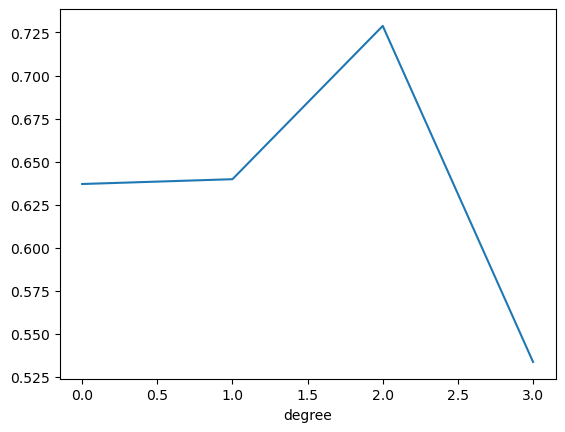

In [26]:
simulations = range_to_simulations[tuple(rates_ranges_options[0])]
print(f"# simulations = {len(simulations)}")
all_simulations = pd.concat(simulations)
max_iter = all_simulations.degree.max()
print(f"max_iter = {max_iter}")
all_simulations.groupby("degree")["connectence"].mean().plot()

In [13]:
all_simulations.columns

Index(['Unnamed: 0', 'base_extinct_level',
       'total_pollinator_in_base_extinctions',
       'total_plants_in_base_extinctions',
       'total_plants_in_base_extinctions_diploid',
       'total_plants_in_base_extinctions_polyploid',
       'total_plants_in_base_extinctions_unknown', 'connectence',
       'total_pollinator_in_primary_extinctions',
       'total_plants_in_primary_extinctions',
       'total_plants_in_primary_extinctions_diploid',
       'total_plants_in_primary_extinctions_polyploid',
       'total_plants_in_primary_extinctions_unknown',
       'total_pollinators_prior_extinction', 'total_plants_prior_extinction',
       'total_plants_prior_extinction_diploid',
       'total_plants_prior_extinction_polyploid',
       'total_plants_prior_extinction_unknown', 'degree',
       'baseline_n_pollinators', 'baseline_n_plant', 'baseline_connectence'],
      dtype='object')